In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

data = [("zuzan", 19, "pilot", "panik", "Perempuan"), 
        ("dhiya", 20, "Pembalap", "Servis motor", "Perempuan"), 
        ("sywuul",17, "mahasiswa", "Mancing", "Perempuan"), 
        ("rahma", 17, "penyanyi", "Berkebun", "Perempuan")]
columns = ["Nama", "Usia", "Pekerjaan", "Hobi", "Gender"]

df = spark.createDataFrame(data, columns)

df.show()

+------+----+---------+------------+---------+
|  Nama|Usia|Pekerjaan|        Hobi|   Gender|
+------+----+---------+------------+---------+
| zuzan|  19|    pilot|       panik|Perempuan|
| dhiya|  20| Pembalap|Servis motor|Perempuan|
|sywuul|  17|mahasiswa|     Mancing|Perempuan|
| rahma|  17| penyanyi|    Berkebun|Perempuan|
+------+----+---------+------------+---------+



In [4]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

data = [("zuzan", 19, "pilot", "panik", "Perempuan"), 
        ("dhiya", 20, "Pembalap", "Servis motor", "Perempuan"), 
        ("sywuul",17, "mahasiswa", "Mancing", "Perempuan"), 
        ("rahma", 17, "penyanyi", "Berkebun", "Perempuan")]
columns = ["Nama", "Usia", "Pekerjaan", "Hobi", "Gender"]

df = spark.createDataFrame(data, columns)

df.show()

# Filtering data
df_filtered = df.filter(df['Usia'] > 30)
df_filtered.show()

# Menghitung rata-rata usia
from pyspark.sql.functions import avg
df.groupBy().agg(avg("Usia")).show()

# Mengurutkan data berdasarkan usia
df_sorted = df.orderBy("Usia", ascending=False)
df_sorted.show()

+------+----+---------+------------+---------+
|  Nama|Usia|Pekerjaan|        Hobi|   Gender|
+------+----+---------+------------+---------+
| zuzan|  19|    pilot|       panik|Perempuan|
| dhiya|  20| Pembalap|Servis motor|Perempuan|
|sywuul|  17|mahasiswa|     Mancing|Perempuan|
| rahma|  17| penyanyi|    Berkebun|Perempuan|
+------+----+---------+------------+---------+

+----+----+---------+----+------+
|Nama|Usia|Pekerjaan|Hobi|Gender|
+----+----+---------+----+------+
+----+----+---------+----+------+

+---------+
|avg(Usia)|
+---------+
|    18.25|
+---------+

+------+----+---------+------------+---------+
|  Nama|Usia|Pekerjaan|        Hobi|   Gender|
+------+----+---------+------------+---------+
| dhiya|  20| Pembalap|Servis motor|Perempuan|
| zuzan|  19|    pilot|       panik|Perempuan|
|sywuul|  17|mahasiswa|     Mancing|Perempuan|
| rahma|  17| penyanyi|    Berkebun|Perempuan|
+------+----+---------+------------+---------+



In [5]:
import pandas as pd

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["zuzan", "dhiya", "sywuul", "rahma"], "Usia": [19, 20, 17, 17]}
df_pandas = pd.DataFrame(data_pandas)

# Menampilkan DataFrame Pandas
df_pandas

,Nama,Usia
0,zuzan,19
1,dhiya,20
2,sywuul,17
3,rahma,17


     Nama  Usia  Pekerjaan
0   zuzan    19      pilot
1   dhiya    20   pembalap
2  sywuul    17  mahasiswa
3   rahma    17   Penyanyi
        Usia
count   4.00
mean   18.25
std     1.50
min    17.00
25%    17.00
50%    18.00
75%    19.25
max    20.00


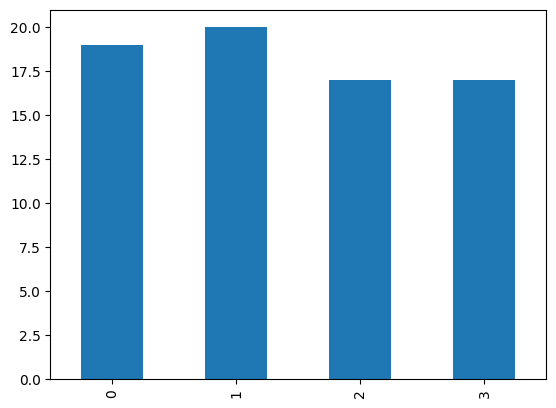

In [6]:
import pandas as pd

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["zuzan", "dhiya", "sywuul", "rahma"], "Usia": [19, 20, 17, 17]}
df_pandas = pd.DataFrame(data_pandas)

# Membuat DataFrame kedua
data_pandas_2 = {"Nama": ["zuzan", "dhiya", "sywuul", "rahma"], "Pekerjaan": ["pilot", "pembalap", "mahasiswa", "Penyanyi"]}
df_pandas_2 = pd.DataFrame(data_pandas_2)

# Join antara dua DataFrame
df_joined = pd.merge(df_pandas, df_pandas_2, on="Nama")
print(df_joined)

# Menghitung statistik deskriptif
print(df_pandas.describe())

# Plotting Data
import matplotlib.pyplot as plt
df_pandas['Usia'].plot(kind='bar')
plt.show()

In [7]:
# Mengonversi DataFrame dari PySpark ke Pandas
df_pandas_from_spark = df.toPandas()

# Mengonversi DataFrame dari Pandas ke PySpark
df_spark_from_pandas = spark.createDataFrame(df_pandas)

# Menampilkan DataFrame hasil konversi
df_pandas_from_spark, df_spark_from_pandas.show()

+------+----+
|  Nama|Usia|
+------+----+
| zuzan|  19|
| dhiya|  20|
|sywuul|  17|
| rahma|  17|
+------+----+



(     Nama  Usia  Pekerjaan          Hobi     Gender
 0   zuzan    19      pilot         panik  Perempuan
 1   dhiya    20   Pembalap  Servis motor  Perempuan
 2  sywuul    17  mahasiswa       Mancing  Perempuan
 3   rahma    17   penyanyi      Berkebun  Perempuan,
 None)

In [8]:
# Mengonversi DataFrame dari PySpark ke Pandas
df_pandas_from_spark = df.toPandas()

# Mengonversi DataFrame dari Pandas ke PySpark
df_spark_from_pandas = spark.createDataFrame(df_pandas)

# Menampilkan DataFrame hasil konversi
df_pandas_from_spark, df_spark_from_pandas.show()

+------+----+
|  Nama|Usia|
+------+----+
| zuzan|  19|
| dhiya|  20|
|sywuul|  17|
| rahma|  17|
+------+----+



(     Nama  Usia  Pekerjaan          Hobi     Gender
 0   zuzan    19      pilot         panik  Perempuan
 1   dhiya    20   Pembalap  Servis motor  Perempuan
 2  sywuul    17  mahasiswa       Mancing  Perempuan
 3   rahma    17   penyanyi      Berkebun  Perempuan,
 None)